# Recommended System based on Collaborative Filtering
                                                                                                -- By Saptaswa Basu

Recommended System is a information based filtering system which provides suggestions for perticular item, i.e in case of movie recommendetion system it will help to suggest which movie the user should watch after finishing any one. 

Recommended system basically are two types:
- Content based filtering,   Ex- Netflix
- Collaborative filtering,   Ex- Amazon

Here we are using programming language as Python(Numpy,Pandas) along with the concept of correlation, with the help of this concept we can find out which movie is going to recommended next.

In this project the recommendation filtering is primarily based on user ratings.

The dataset is collected from `MovieLens` datasets : https://grouplens.org/datasets/movielens/

In [3]:
import numpy as np
import pandas as pd

In [4]:
column_names = ['user_id','item_id','rating','timestamp']
movie_details = pd.read_csv('u.data.txt' , sep = '\t', names = column_names)

In [9]:
movie_details

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [19]:
# How many unique movie item are there
movie_details.item_id.nunique()

1682

In [5]:
movie_titles = pd.read_csv('Movie_Id_Titles.txt')
movie_titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [6]:
movie_df = pd.merge(movie_details, movie_titles, on = 'item_id')
movie_df

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [23]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [24]:
movie_df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


## Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [8]:
movie_df.head(3)

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)


In [8]:
movie_df.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [9]:
movie_df.groupby('title')['user_id'].nunique().sort_values(ascending = False).head(10) 

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: user_id, dtype: int64

In [9]:
avg_ratings = pd.DataFrame(movie_df.groupby('title')['rating'].mean())
avg_ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [10]:
avg_ratings['No of ratings'] = pd.DataFrame(movie_df.groupby('title')['rating'].count())
avg_ratings

,rating,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


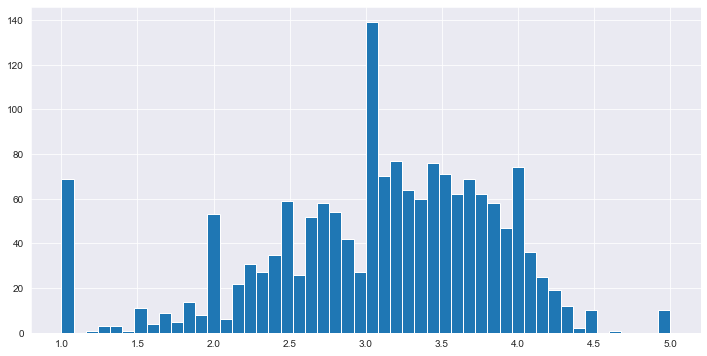

In [12]:
plt.figure(figsize = (12,6))
avg_ratings['rating'].hist(bins = 50);

##### From the above distribution we can say that most of the people gave the rating from 3 - 4, as there can be seen some outlayers at rating 1 and some at rating 5 but apart from those outlayers most of the curve followed `Normal guession distribution`.

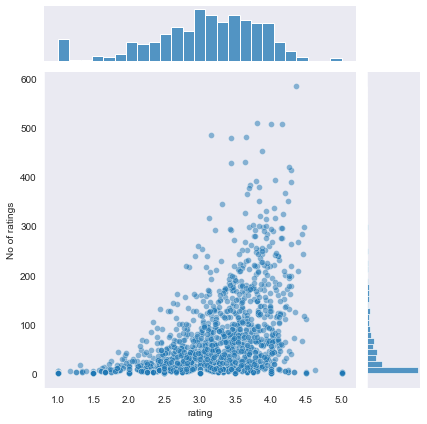

In [94]:
sns.jointplot(x = 'rating', y = 'No of ratings', data = avg_ratings, alpha = 0.5 );

##### Now from the above plot we can say where the points are more dense,  there is the most number of rating has been given.

## Recommended System Creation

Here we'll create a matrix with the help of `df.pivot_table` where `user'id` will be used as index , `movie name` as columns and the the `ratings` will be the value of those columns/movies.

In [40]:
movie_df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [11]:
movie_matrix = movie_df.pivot_table(index = 'user_id', columns = 'title', values = 'rating')
movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
movie_matrix.columns

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='title', length=1664)

In [108]:
avg_ratings.sort_values('No of ratings',ascending = False).head(5)

,rating,No of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [12]:
# Movies rated by most users
high_rated_movies = avg_ratings.loc[avg_ratings['No of ratings'] > 300].sort_values('rating', ascending = False).head(10) 
high_rated_movies

,rating,No of ratings
title,,
Star Wars (1977),4.359589,584
"Silence of the Lambs, The (1991)",4.289744,390
"Godfather, The (1972)",4.283293,413
Raiders of the Lost Ark (1981),4.252381,420
Titanic (1997),4.245714,350
"Empire Strikes Back, The (1980)",4.206522,368
"Princess Bride, The (1987)",4.172840,324
Fargo (1996),4.155512,508
Monty Python and the Holy Grail (1974),4.066456,316


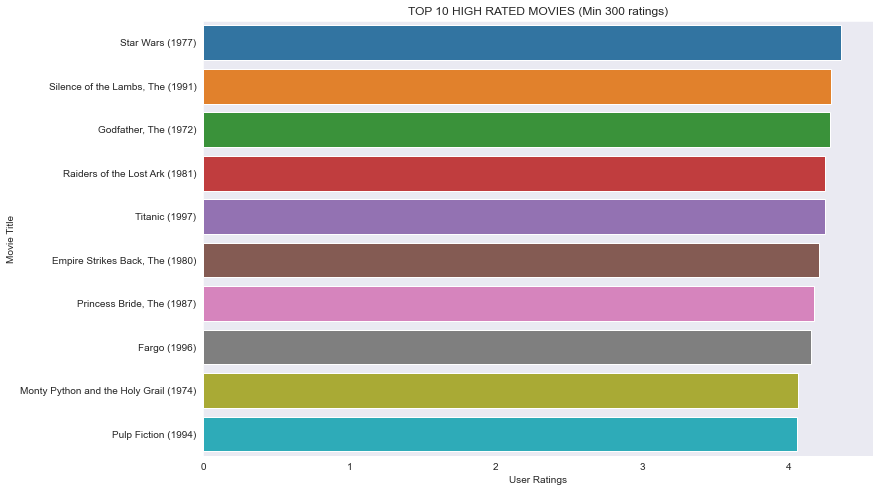

In [203]:
plt.figure(figsize = (12,8))
sns.barplot(y = high_rated_movies.index , x = high_rated_movies.rating)
plt.title('TOP 10 HIGH RATED MOVIES (Min 300 ratings)')
plt.xlabel('User Ratings')
plt.ylabel('Movie Title');

In [13]:
# Recommended movies for Star Wars (1977)
starwars_ratings = movie_matrix['Star Wars (1977)']
starwars_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [14]:
starwars_alike = movie_matrix.corrwith(starwars_ratings)

C:\Users\saptaswa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\saptaswa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [15]:
starwars_corr = pd.DataFrame(starwars_alike, columns = ['Correlation'])
starwars_corr.dropna(inplace = True)
starwars_corr.head(10)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [16]:
starwars_corr = starwars_corr.join(avg_ratings['No of ratings'])
starwars_corr.head(10)

,Correlation,No of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41
2 Days in the Valley (1996),0.066654,93
"20,000 Leagues Under the Sea (1954)",0.289768,72
2001: A Space Odyssey (1968),0.230884,259
"39 Steps, The (1935)",0.106453,59


In [17]:
starwars_correlation = starwars_corr.loc[starwars_corr['No of ratings'] > 100] 
starwars_correlation.head(10)

,Correlation,No of ratings
title,,
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
2001: A Space Odyssey (1968),0.230884,259
Absolute Power (1997),0.085440,127
"Abyss, The (1989)",0.203709,151
Ace Ventura: Pet Detective (1994),0.062689,103
"Adventures of Priscilla, Queen of the Desert, The (1994)",0.054740,111
"African Queen, The (1951)",0.230540,152
Air Force One (1997),0.113164,431


In [18]:
starwars_recommendations = starwars_correlation.sort_values('Correlation', ascending = False).head(10) 
starwars_recommendations

,Correlation,No of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


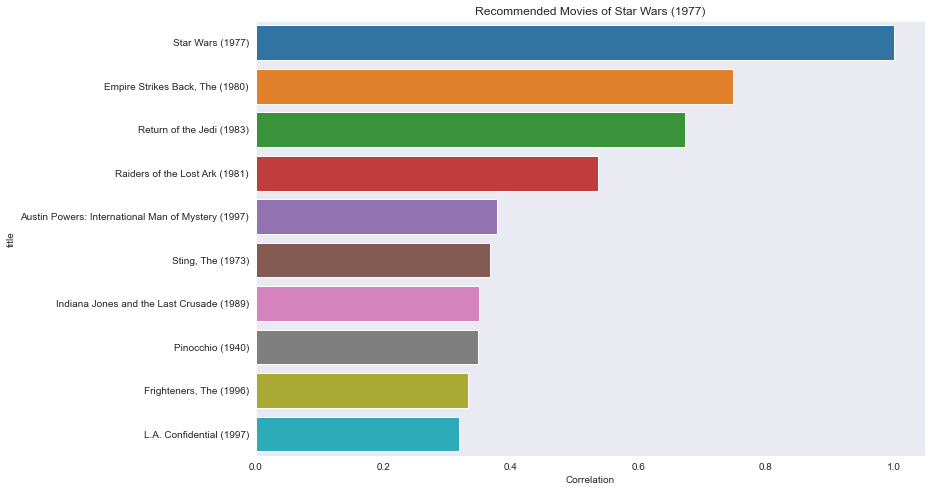

In [19]:
plt.figure(figsize = (12,8))
sns.barplot(y = starwars_recommendations.index , x = starwars_recommendations.Correlation)
plt.title('Recommended Movies of Star Wars (1977)');

In [ ]:
# Recommended movies for Godfather, The (1972)

In [181]:
godfather_ratings = movie_matrix['Godfather, The (1972)']
godfather_alike = movie_matrix.corrwith(godfather_ratings)
godfather_corr = pd.DataFrame(godfather_alike, columns = ['Correlation']).join(avg_ratings['No of ratings'])
godfather_correlation = godfather_corr.loc[godfather_corr['No of ratings'] > 100]
godfather_recommendations = godfather_correlation.sort_values('Correlation', ascending = False).head(10)
godfather_recommendations

C:\Users\saptaswa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\saptaswa\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,No of ratings
title,,
"Godfather, The (1972)",1.000000,413
"Godfather: Part II, The (1974)",0.683862,209
GoodFellas (1990),0.421477,226
"People vs. Larry Flynt, The (1996)",0.393439,215
Bonnie and Clyde (1967),0.386226,122
Chinatown (1974),0.376133,147
Apocalypse Now (1979),0.374378,221
Some Like It Hot (1959),0.366085,128
Dead Man Walking (1995),0.360525,299


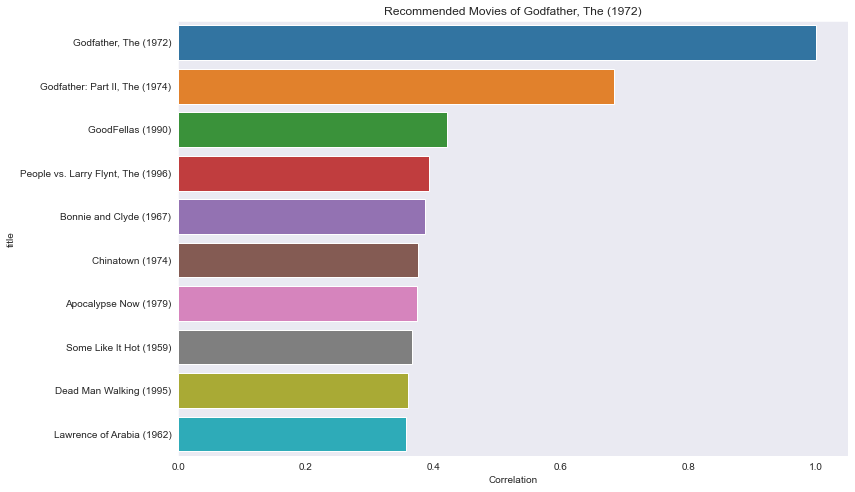

In [204]:
plt.figure(figsize = (12,8))
sns.barplot(y = godfather_recommendations.index , x = godfather_recommendations.Correlation)
plt.title('Recommended Movies of Godfather, The (1972)');

                                                                                                    -- By SAPTASWA BASU